## 0. Data generation

In [336]:
import numpy as np

For simplicity, provide normalized dataset
- x, y, vx, vy all from 0 to 1
- just one wall

In [463]:
data_zero+[0.3,0,0,0.3]

array([[ 0.41036555,  0.30704956, -0.11261137,  0.3317709 ],
       [ 1.19353975,  0.65932076, -0.40275368,  0.31537474],
       [ 0.6224569 ,  0.04857568, -0.67109612,  0.66090376],
       ...,
       [ 0.69574382,  0.08378608, -0.47127988,  1.18126585],
       [ 0.55769537,  0.19647781, -0.72792823,  0.86326867],
       [ 1.07146413,  0.40571505, -0.26990826,  1.16844822]])

In [343]:
t = 2
evolv_matrix = np.array([[1, t, 0, 0], [0, 1, 0, 0], [0, 0, -1, 0], [0, 0, -t, -1]])

In [344]:
data_zero = np.random.rand(100,4)*np.array([1,1,-1,1])
data_t = (evolv_matrix@data_zero.T).T

In [345]:
X_train = data_zero[:80]
Y_train = data_t[:80]
X_test = data_zero[80:]
Y_test = data_t[80:]

## 1. Keras version

In [224]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import losses, regularizers

model = Sequential()
model.add(Dense(4, input_dim=4, kernel_regularizer=regularizers.l1(0.00001), bias_regularizer=regularizers.l1(0.00001)))
#model.add(Dense(4))
sgd = SGD(lr=0.2, decay=1e-3)

model.compile(optimizer=sgd,
              loss=losses.mean_squared_error,
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100,batch_size=4)

Epoch 1/100
80/80 [==============================] - 1s 11ms/step - loss: 0.5368 - acc: 0.6125
Epoch 2/100
80/80 [==============================] - 0s 238us/step - loss: 0.2075 - acc: 0.8125
Epoch 3/100
80/80 [==============================] - 0s 252us/step - loss: 0.1516 - acc: 0.8625
Epoch 4/100
80/80 [==============================] - 0s 182us/step - loss: 0.1079 - acc: 0.8750
Epoch 5/100
80/80 [==============================] - 0s 181us/step - loss: 0.0794 - acc: 0.8750
Epoch 6/100
80/80 [==============================] - 0s 165us/step - loss: 0.0583 - acc: 0.9125
Epoch 7/100
80/80 [==============================] - 0s 182us/step - loss: 0.0433 - acc: 0.9250
Epoch 8/100
80/80 [==============================] - 0s 189us/step - loss: 0.0334 - acc: 0.9500
Epoch 9/100
80/80 [==============================] - 0s 185us/step - loss: 0.0260 - acc: 0.9625
Epoch 10/100
80/80 [==============================] - 0s 182us/step - loss: 0.0200 - acc: 0.9750
Epoch 11/100
80/80 [====================

80/80 [==============================] - 0s 216us/step - loss: 8.5163e-05 - acc: 1.0000
Epoch 84/100
80/80 [==============================] - 0s 183us/step - loss: 8.4836e-05 - acc: 1.0000
Epoch 85/100
80/80 [==============================] - 0s 173us/step - loss: 8.4470e-05 - acc: 1.0000
Epoch 86/100
80/80 [==============================] - 0s 203us/step - loss: 8.4192e-05 - acc: 1.0000
Epoch 87/100
80/80 [==============================] - 0s 311us/step - loss: 8.3917e-05 - acc: 1.0000
Epoch 88/100
80/80 [==============================] - 0s 211us/step - loss: 8.3663e-05 - acc: 1.0000
Epoch 89/100
80/80 [==============================] - 0s 193us/step - loss: 8.3476e-05 - acc: 1.0000
Epoch 90/100
80/80 [==============================] - 0s 183us/step - loss: 8.3255e-05 - acc: 1.0000
Epoch 91/100
80/80 [==============================] - 0s 174us/step - loss: 8.2998e-05 - acc: 1.0000
Epoch 92/100
80/80 [==============================] - 0s 182us/step - loss: 8.2837e-05 - acc: 1.0000
Epo

In [225]:
model.evaluate(X_test, Y_test, batch_size=8)

20/20 [==============================] - 0s 22ms/step


[8.190799853764474e-05, 1.0]

In [226]:
model.get_weights()[0].T

array([[ 9.99639153e-01,  1.99800372e+00, -9.50632792e-04,
        -3.29965912e-03],
       [ 4.47140701e-05,  9.99200225e-01, -1.14527276e-04,
        -8.11941165e-04],
       [-1.10197195e-03,  2.74101994e-03, -9.97455001e-01,
         3.96109046e-03],
       [-2.41778180e-05, -2.30684946e-03,  1.99748087e+00,
         9.95409906e-01]], dtype=float32)

In [227]:
evolv_matrix

array([[ 1,  2,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0, -1,  0],
       [ 0,  0,  2,  1]])

In [228]:
model.get_weights()[1]

array([ 0.0033841 ,  0.00085097, -0.00415541,  0.00482259], dtype=float32)

## 1.2 Autoencoder 

- Input a consecutive series of $x$ and $y$s. 
- Make the magnitude of $v_y$ large enough such that it can reach the wall.

In [487]:
def make_series(data, dt = 0.1):
    x, vx, vy, y = data
    return np.hstack((x+vx*np.arange(-3,1)*dt, y+vy*np.arange(0,4)*dt))#.reshape(-1,len(np.arange(-5,6)))

In [489]:
data_zero = np.random.rand(5000,4)*np.array([1,1,-1,1])+np.array([0,0,-0.5,0])
data_t = (evolv_matrix@data_zero.T).T

In [490]:
frames_zero = np.array([make_series(data_zero[i]) for i in range(len(data_zero))])
frames_t = np.array([make_series(data_t[i]) for i in range(len(data_t))])

In [491]:
X_train =frames_zero[:len(frames_zero)*4//5]
Y_train = frames_t[:len(frames_zero)*4//5]
X_test = frames_zero[len(frames_zero)*4//5:]
Y_test = frames_t[len(frames_zero)*4//5:]

In [468]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import losses, regularizers

model = Sequential()
model.add(Dense(8, input_dim=int(2*len(np.arange(-5,6))), activation='relu',
               kernel_regularizer=regularizers.l1(0.00001), bias_regularizer=regularizers.l1(0.00001)))
model.add(Dense(2, activation='relu',
               kernel_regularizer=regularizers.l1(0.00001), bias_regularizer=regularizers.l1(0.00001)))
model.add(Dense(2, activation='relu',
               kernel_regularizer=regularizers.l1(0.00001), bias_regularizer=regularizers.l1(0.00001)))
model.add(Dense(8, activation='relu',
               kernel_regularizer=regularizers.l1(0.00001), bias_regularizer=regularizers.l1(0.00001)))
model.add(Dense(int(2*len(np.arange(-5,6))),
               kernel_regularizer=regularizers.l1(0.00001), bias_regularizer=regularizers.l1(0.00001)))
sgd = SGD(lr=0.3, decay=1e-3)

model.compile(optimizer=sgd,
              loss=losses.mean_squared_error,
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=500,batch_size=32)

ValueError: Error when checking input: expected dense_347_input to have shape (22,) but got array with shape (14,)

In [515]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras import losses, regularizers

model = Sequential()
#model.add(Dense(8, input_dim=int(8), activation='relu'))
model.add(Dense(2, input_dim=int(8), activation='relu'))
model.add(Dense(2, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(int(8)))
sgd = SGD(lr=0.2, decay=1e-4)

model.compile(optimizer=sgd,
              loss=losses.mean_squared_error,
              metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=1000,batch_size=64)

Epoch 1/1000
4000/4000 [==============================] - 3s 722us/step - loss: 0.8117 - acc: 0.5980
Epoch 2/1000
4000/4000 [==============================] - 0s 27us/step - loss: 0.4167 - acc: 0.6095
Epoch 3/1000
4000/4000 [==============================] - 0s 24us/step - loss: 0.4106 - acc: 0.6095
Epoch 4/1000
4000/4000 [==============================] - 0s 24us/step - loss: 0.3930 - acc: 0.5187
Epoch 5/1000
4000/4000 [==============================] - 0s 29us/step - loss: 0.3627 - acc: 0.4193
Epoch 6/1000
4000/4000 [==============================] - 0s 25us/step - loss: 0.3426 - acc: 0.4520
Epoch 7/1000
4000/4000 [==============================] - 0s 23us/step - loss: 0.3310 - acc: 0.6490
Epoch 8/1000
4000/4000 [==============================] - 0s 26us/step - loss: 0.3164 - acc: 0.6693
Epoch 9/1000
4000/4000 [==============================] - 0s 25us/step - loss: 0.2909 - acc: 0.6942
Epoch 10/1000
4000/4000 [==============================] - 0s 25us/step - loss: 0.2679 - acc: 0.702

4000/4000 [==============================] - 0s 27us/step - loss: 2.8272e-04 - acc: 0.9912
Epoch 81/1000
4000/4000 [==============================] - 0s 33us/step - loss: 2.8111e-04 - acc: 0.9912
Epoch 82/1000
4000/4000 [==============================] - 0s 30us/step - loss: 2.7916e-04 - acc: 0.9915
Epoch 83/1000
4000/4000 [==============================] - 0s 34us/step - loss: 2.7740e-04 - acc: 0.9915
Epoch 84/1000
4000/4000 [==============================] - 0s 32us/step - loss: 2.7597e-04 - acc: 0.9918
Epoch 85/1000
4000/4000 [==============================] - 0s 36us/step - loss: 2.7437e-04 - acc: 0.9910
Epoch 86/1000
4000/4000 [==============================] - 0s 32us/step - loss: 2.7285e-04 - acc: 0.9910
Epoch 87/1000
4000/4000 [==============================] - 0s 28us/step - loss: 2.7144e-04 - acc: 0.9912
Epoch 88/1000
4000/4000 [==============================] - 0s 30us/step - loss: 2.6998e-04 - acc: 0.9910
Epoch 89/1000
4000/4000 [==============================] - 0s 31us/st

4000/4000 [==============================] - 0s 25us/step - loss: 2.3586e-04 - acc: 0.9912
Epoch 158/1000
4000/4000 [==============================] - 0s 26us/step - loss: 2.3586e-04 - acc: 0.9915
Epoch 159/1000
4000/4000 [==============================] - 0s 26us/step - loss: 2.3571e-04 - acc: 0.9915
Epoch 160/1000
4000/4000 [==============================] - 0s 30us/step - loss: 2.3542e-04 - acc: 0.9915
Epoch 161/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.3510e-04 - acc: 0.9915
Epoch 162/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.3527e-04 - acc: 0.9912
Epoch 163/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.3504e-04 - acc: 0.9912
Epoch 164/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.3471e-04 - acc: 0.9915
Epoch 165/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.3466e-04 - acc: 0.9912
Epoch 166/1000
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 22us/step - loss: 2.2755e-04 - acc: 0.9920
Epoch 235/1000
4000/4000 [==============================] - 0s 25us/step - loss: 2.2742e-04 - acc: 0.9918
Epoch 236/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.2726e-04 - acc: 0.9920
Epoch 237/1000
4000/4000 [==============================] - 0s 25us/step - loss: 2.2722e-04 - acc: 0.9918
Epoch 238/1000
4000/4000 [==============================] - 0s 21us/step - loss: 2.2727e-04 - acc: 0.9922
Epoch 239/1000
4000/4000 [==============================] - 0s 27us/step - loss: 2.2707e-04 - acc: 0.9918
Epoch 240/1000
4000/4000 [==============================] - 0s 25us/step - loss: 2.2692e-04 - acc: 0.9920
Epoch 241/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.2705e-04 - acc: 0.9920
Epoch 242/1000
4000/4000 [==============================] - 0s 23us/step - loss: 2.2680e-04 - acc: 0.9920
Epoch 243/1000
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 36us/step - loss: 2.2364e-04 - acc: 0.9915
Epoch 312/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.2339e-04 - acc: 0.9920
Epoch 313/1000
4000/4000 [==============================] - 0s 23us/step - loss: 2.2354e-04 - acc: 0.9920
Epoch 314/1000
4000/4000 [==============================] - 0s 23us/step - loss: 2.2358e-04 - acc: 0.9920
Epoch 315/1000
4000/4000 [==============================] - 0s 26us/step - loss: 2.2346e-04 - acc: 0.9920
Epoch 316/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.2353e-04 - acc: 0.9920
Epoch 317/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.2333e-04 - acc: 0.9920
Epoch 318/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.2325e-04 - acc: 0.9920
Epoch 319/1000
4000/4000 [==============================] - 0s 25us/step - loss: 2.2337e-04 - acc: 0.9920
Epoch 320/1000
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 23us/step - loss: 2.2127e-04 - acc: 0.9918
Epoch 389/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.2121e-04 - acc: 0.9918
Epoch 390/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.2114e-04 - acc: 0.9915
Epoch 391/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.2117e-04 - acc: 0.9918
Epoch 392/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.2110e-04 - acc: 0.9918
Epoch 393/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.2111e-04 - acc: 0.9918
Epoch 394/1000
4000/4000 [==============================] - 0s 25us/step - loss: 2.2110e-04 - acc: 0.9915
Epoch 395/1000
4000/4000 [==============================] - 0s 25us/step - loss: 2.2102e-04 - acc: 0.9918
Epoch 396/1000
4000/4000 [==============================] - 0s 23us/step - loss: 2.2115e-04 - acc: 0.9915
Epoch 397/1000
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 23us/step - loss: 2.1969e-04 - acc: 0.9915
Epoch 466/1000
4000/4000 [==============================] - 0s 23us/step - loss: 2.1960e-04 - acc: 0.9918
Epoch 467/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1971e-04 - acc: 0.9915
Epoch 468/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1962e-04 - acc: 0.9918
Epoch 469/1000
4000/4000 [==============================] - 0s 26us/step - loss: 2.1961e-04 - acc: 0.9915
Epoch 470/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1951e-04 - acc: 0.9918
Epoch 471/1000
4000/4000 [==============================] - 0s 25us/step - loss: 2.1953e-04 - acc: 0.9918
Epoch 472/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1949e-04 - acc: 0.9915
Epoch 473/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1952e-04 - acc: 0.9920
Epoch 474/1000
4000/4000 [==============================] - 0

4000/4000 [==============================] - ETA: 0s - loss: 2.1994e-04 - acc: 0.992 - 0s 26us/step - loss: 2.1850e-04 - acc: 0.9915
Epoch 543/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1845e-04 - acc: 0.9918
Epoch 544/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.1852e-04 - acc: 0.9918
Epoch 545/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1851e-04 - acc: 0.9918
Epoch 546/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1841e-04 - acc: 0.9918
Epoch 547/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.1840e-04 - acc: 0.9918
Epoch 548/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1846e-04 - acc: 0.9918
Epoch 549/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1840e-04 - acc: 0.9918
Epoch 550/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.1836e-04 - acc: 0.9915
Epoch 551/1000
4000

4000/4000 [==============================] - 0s 26us/step - loss: 2.1753e-04 - acc: 0.9918
Epoch 620/1000
4000/4000 [==============================] - 0s 26us/step - loss: 2.1767e-04 - acc: 0.9915
Epoch 621/1000
4000/4000 [==============================] - 0s 33us/step - loss: 2.1754e-04 - acc: 0.9920
Epoch 622/1000
4000/4000 [==============================] - 0s 28us/step - loss: 2.1761e-04 - acc: 0.9918
Epoch 623/1000
4000/4000 [==============================] - 0s 33us/step - loss: 2.1757e-04 - acc: 0.9915
Epoch 624/1000
4000/4000 [==============================] - 0s 40us/step - loss: 2.1757e-04 - acc: 0.9918
Epoch 625/1000
4000/4000 [==============================] - 0s 34us/step - loss: 2.1754e-04 - acc: 0.9915
Epoch 626/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.1754e-04 - acc: 0.9918
Epoch 627/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1746e-04 - acc: 0.9918
Epoch 628/1000
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 27us/step - loss: 2.1694e-04 - acc: 0.9912
Epoch 697/1000
4000/4000 [==============================] - 0s 27us/step - loss: 2.1693e-04 - acc: 0.9918
Epoch 698/1000
4000/4000 [==============================] - 0s 35us/step - loss: 2.1696e-04 - acc: 0.9918
Epoch 699/1000
4000/4000 [==============================] - 0s 30us/step - loss: 2.1691e-04 - acc: 0.9918
Epoch 700/1000
4000/4000 [==============================] - 0s 32us/step - loss: 2.1687e-04 - acc: 0.9918
Epoch 701/1000
4000/4000 [==============================] - 0s 33us/step - loss: 2.1680e-04 - acc: 0.9918
Epoch 702/1000
4000/4000 [==============================] - 0s 36us/step - loss: 2.1686e-04 - acc: 0.9915
Epoch 703/1000
4000/4000 [==============================] - 0s 29us/step - loss: 2.1686e-04 - acc: 0.9918
Epoch 704/1000
4000/4000 [==============================] - 0s 32us/step - loss: 2.1684e-04 - acc: 0.9915
Epoch 705/1000
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 42us/step - loss: 2.1635e-04 - acc: 0.9918
Epoch 774/1000
4000/4000 [==============================] - 0s 37us/step - loss: 2.1635e-04 - acc: 0.9918
Epoch 775/1000
4000/4000 [==============================] - 0s 40us/step - loss: 2.1637e-04 - acc: 0.9915
Epoch 776/1000
4000/4000 [==============================] - 0s 42us/step - loss: 2.1635e-04 - acc: 0.9918
Epoch 777/1000
4000/4000 [==============================] - 0s 38us/step - loss: 2.1635e-04 - acc: 0.9918
Epoch 778/1000
4000/4000 [==============================] - 0s 37us/step - loss: 2.1628e-04 - acc: 0.9915
Epoch 779/1000
4000/4000 [==============================] - 0s 28us/step - loss: 2.1623e-04 - acc: 0.9918
Epoch 780/1000
4000/4000 [==============================] - 0s 23us/step - loss: 2.1635e-04 - acc: 0.9918
Epoch 781/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1637e-04 - acc: 0.9915
Epoch 782/1000
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 31us/step - loss: 2.1588e-04 - acc: 0.9918
Epoch 851/1000
4000/4000 [==============================] - 0s 26us/step - loss: 2.1592e-04 - acc: 0.9918
Epoch 852/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.1584e-04 - acc: 0.9915
Epoch 853/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1588e-04 - acc: 0.9918
Epoch 854/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.1588e-04 - acc: 0.9918
Epoch 855/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.1586e-04 - acc: 0.9915
Epoch 856/1000
4000/4000 [==============================] - 0s 28us/step - loss: 2.1584e-04 - acc: 0.9918
Epoch 857/1000
4000/4000 [==============================] - 0s 26us/step - loss: 2.1585e-04 - acc: 0.9918
Epoch 858/1000
4000/4000 [==============================] - 0s 26us/step - loss: 2.1588e-04 - acc: 0.9915
Epoch 859/1000
4000/4000 [==============================] - 0

4000/4000 [==============================] - 0s 23us/step - loss: 2.1551e-04 - acc: 0.9918
Epoch 928/1000
4000/4000 [==============================] - 0s 32us/step - loss: 2.1551e-04 - acc: 0.9915
Epoch 929/1000
4000/4000 [==============================] - 0s 25us/step - loss: 2.1548e-04 - acc: 0.9918
Epoch 930/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.1538e-04 - acc: 0.9918
Epoch 931/1000
4000/4000 [==============================] - 0s 24us/step - loss: 2.1559e-04 - acc: 0.9918
Epoch 932/1000
4000/4000 [==============================] - 0s 23us/step - loss: 2.1554e-04 - acc: 0.9918
Epoch 933/1000
4000/4000 [==============================] - 0s 29us/step - loss: 2.1547e-04 - acc: 0.9915
Epoch 934/1000
4000/4000 [==============================] - 0s 25us/step - loss: 2.1544e-04 - acc: 0.9918
Epoch 935/1000
4000/4000 [==============================] - 0s 22us/step - loss: 2.1544e-04 - acc: 0.9918
Epoch 936/1000
4000/4000 [==============================] - 0

In [ ]:
model.summary()

In [ ]:
model.evaluate(X_test, Y_test, batch_size=8)

In [360]:
model.get_weights()[4].T

array([[-0.5308195 ,  0.07949029,  1.8983396 ],
       [-0.9700415 ,  1.8663126 ,  0.24483967],
       [ 0.9536323 ,  0.0384352 , -0.27256805]], dtype=float32)

In [270]:
evolv_matrix

array([[ 1,  2,  0,  0],
       [ 0,  1,  0,  0],
       [ 0,  0, -1,  0],
       [ 0,  0,  2,  1]])

In [456]:
model.predict(X_test[:2])

array([[ 0.3782205 ,  0.38400316,  0.3889691 ,  0.39439794,  0.40021732,
         0.40760046,  0.4126064 ,  0.7247642 ,  0.79156697,  0.8598902 ,
         0.92727673,  0.99476165,  1.0617185 ,  1.1297162 ],
       [ 1.9941401 ,  2.0743477 ,  2.1539834 ,  2.2339842 ,  2.314055  ,
         2.394812  ,  2.4741724 , -0.6450726 , -0.6400864 , -0.63459575,
        -0.6297709 , -0.624384  , -0.6193578 , -0.6142442 ]],
      dtype=float32)

In [457]:
Y_test[:2]

array([[ 0.38223923,  0.38656054,  0.39088185,  0.39520316,  0.39952447,
         0.40384578,  0.40816709,  0.71961276,  0.7886009 ,  0.85758904,
         0.92657718,  0.99556532,  1.06455346,  1.13354159],
       [ 1.9390989 ,  2.0365563 ,  2.1340137 ,  2.2314711 ,  2.3289285 ,
         2.4263859 ,  2.5238433 , -0.65979224, -0.64991559, -0.64003894,
        -0.63016228, -0.62028563, -0.61040898, -0.60053232]])

### 1.2.1 Get the feature layer

In [361]:
from keras import backend as K

In [517]:
get_encoder_output = K.function([model.layers[0].input],
                                  [model.layers[0].output])
get_decoder_input = K.function([model.layers[0].input],
                                  [model.layers[1].output])

In [518]:
get_encoder_output([X_train[:1]])[0]

array([[0.88405395, 0.9723457 ]], dtype=float32)

In [519]:
get_decoder_input([X_train[:1]])[0]

array([[2.0800285, 2.1582296]], dtype=float32)

In [520]:
X_train[0]

array([0.0836899 , 0.12606702, 0.16844414, 0.21082126, 0.83986781,
       0.74264973, 0.64543166, 0.54821359])

(0, 2)

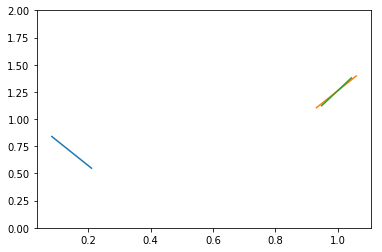

In [521]:
i=0
plt.plot(X_train[0][:4],X_train[0][4:])
plt.plot(Y_train[0][:4],Y_train[0][4:])
plt.plot(model.predict(X_train[i:i+1])[0][:4],model.predict(X_train[i:i+1])[0][4:])
plt.ylim(0,2)

In [522]:
model.get_weights()[0]

array([[ 2.800152  ,  0.53306174],
       [ 0.9657128 , -0.725956  ],
       [-1.4593513 ,  0.11726657],
       [-2.7847214 ,  0.06144502],
       [-0.01494242, -2.619759  ],
       [-0.11400635, -1.3868234 ],
       [ 0.63001966,  1.5420613 ],
       [-0.52033895,  2.9546497 ]], dtype=float32)

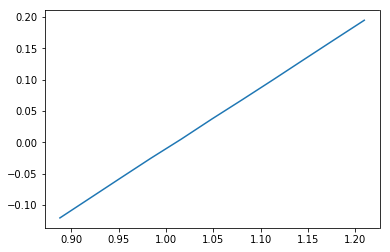

In [445]:
plt.plot(model.predict(X_train[i:i+1])[0][:11],model.predict(X_train[i:i+1])[0][11:])

In [525]:
def slope(item):
    return (item[4:][-1]-item[4:][0])/(item[:4][-1]-item[:4][0])

def intersect(item):
    return item[4:][0]-(item[4:][-1]-item[4:][0])/(item[:4][-1]-item[:4][0])*item[:4][0]

In [526]:
slope(X_train[0])

-2.294116954755231

In [529]:
intersect(X_train[0])

1.031862225949276

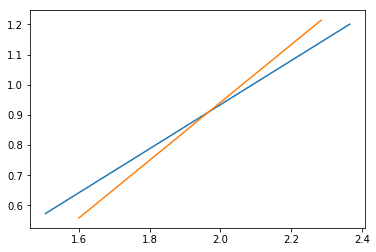

In [429]:
i = 100

plt.plot(Y_test[i][:11],Y_test[i][11:])
plt.plot(model.predict(X_test[i:i+1])[0][:11],model.predict(X_test[i:i+1])[0][11:])

In [412]:
model.predict(X_test[10:11])[0]

array([0.543903  , 0.5426483 , 0.5455199 , 0.5454259 , 0.5479756 ,
       0.54857856, 0.5490289 , 0.55074924, 0.55171824, 0.5518196 ,
       0.55260384, 1.2836453 , 1.2905898 , 1.2999439 , 1.3082067 ,
       1.3155348 , 1.3247287 , 1.3325212 , 1.3403113 , 1.3477052 ,
       1.3566355 , 1.3651634 ], dtype=float32)

In [413]:
Y_test[10:11]

array([[0.53483004, 0.53740113, 0.53997221, 0.54254329, 0.54511438,
        0.54768546, 0.55025654, 0.55282763, 0.55539871, 0.55796979,
        0.56054088, 1.28635845, 1.29380204, 1.30124564, 1.30868924,
        1.31613284, 1.32357643, 1.33102003, 1.33846363, 1.34590723,
        1.35335082, 1.36079442]])

In [311]:
X_test[:2]

array([[0.84199424, 0.84869376, 0.85539328, 0.8620928 , 0.86879232,
        0.87549184, 0.88219137, 0.88889089, 0.89559041, 0.90228993,
        0.90898945, 0.70850428, 0.70897669, 0.70944909, 0.7099215 ,
        0.71039391, 0.71086631, 0.71133872, 0.71181113, 0.71228353,
        0.71275594, 0.71322835],
       [0.79976102, 0.80936503, 0.81896904, 0.82857305, 0.83817706,
        0.84778107, 0.85738508, 0.86698909, 0.8765931 , 0.88619711,
        0.89580112, 0.40745584, 0.40874469, 0.41003354, 0.41132239,
        0.41261125, 0.4139001 , 0.41518895, 0.4164778 , 0.41776665,
        0.41905551, 0.42034436]])

In [318]:
import matplotlib.pyplot as plt

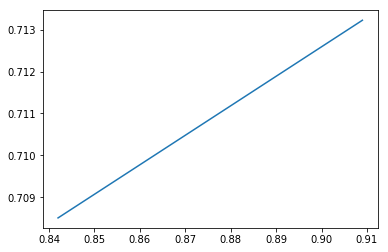

In [321]:
plt.plot(X_test[0][:11],X_test[0][11:])

In [322]:
(X_test[0][11:][-1]-X_test[0][11:][0])/(X_test[0][:11][-1]-X_test[0][:11][0])

0.07051348983120817

In [323]:
X_test[0][11:][-1] - (X_test[0][11:][-1]-X_test[0][11:][0])/(X_test[0][:11][-1]-X_test[0][:11][0])*X_test[0][:11][-1]

0.6491323278977952

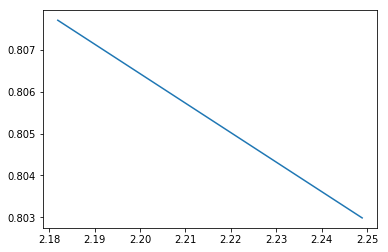

In [324]:
plt.plot(Y_test[0][:11],Y_test[0][11:])

In [325]:
Y_test[0][11:][-1] - (Y_test[0][11:][-1]-Y_test[0][11:][0])/(Y_test[0][:11][-1]-Y_test[0][:11][0])*Y_test[0][:11][-1]

0.961562961751555

In [326]:
(1-0.6491323278977952)/0.07051348983120817

4.975894299687835

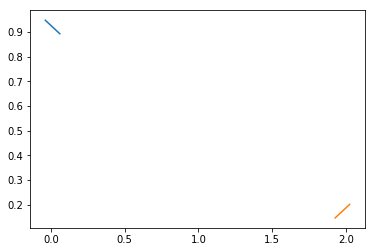

In [365]:
plt.plot(X_test[0][:11],X_test[0][11:])
plt.plot(Y_test[0][:11],Y_test[0][11:])

In [332]:
data_zero[0]

array([0.38084168, 0.25109293, 0.67119263, 0.62562459])

In [333]:
get_encoder_output([X_train[0:1]])[0]

array([[0.15360956, 0.5018474 , 1.2341007 ]], dtype=float32)

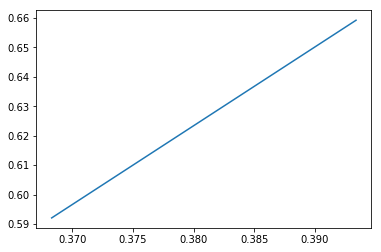

In [334]:
plt.plot(X_train[0][:11],X_train[0][11:])

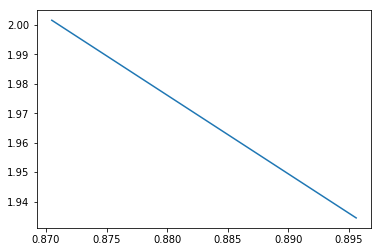

In [335]:
plt.plot(Y_train[0][:11],Y_train[0][11:])

In [ ]:
na